In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Current model
path = "./logs/yolact_plus_resnet50_qualitex_custom_3.log"
# Proportional + COCO
#path = "./logs/yolact_plus_resnet50_qualitex_custom_3_COCO_2.log"
# Proportional
#path = "./logs/yolact_plus_resnet50_qualitex_custom_3_oneclass_proportional.log"
# COCO
#path = "./logs/yolact_plus_resnet50_qualitex_custom_oneclass_COCO_params_3.log"
# First parameters
#path = "./logs/yolact_plus_resnet50_qualitex_custom_3_oneclass_060423.log"
# Old model
#path = "./logs/yolact_plus_resnet50_qualitex_custom_2.log"
with open(path, "r") as j:
    data = j.readlines()

In [16]:
loss = []
box = []
classes = []
mask = []
semantic = []
time = []
lr = []
ref = json.loads(data[1])["time"]
for line in data:
    line_dict = json.loads(line)
    if line_dict["type"] == "train" and line_dict["session"] > 1:
        loss.append(line_dict["data"]["loss"]["T"])
        box.append(line_dict["data"]["loss"]["B"])
        classes.append(line_dict["data"]["loss"]["C"])
        mask.append(line_dict["data"]["loss"]["M"])
        semantic.append(line_dict["data"]["loss"]["S"])
        time.append((line_dict["time"]-ref)/3600)
        lr.append(line_dict["data"]["lr"])

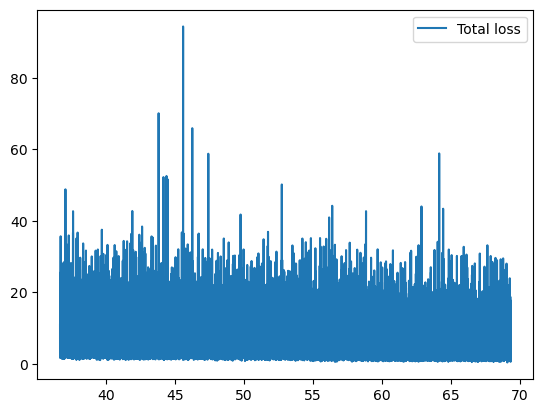

In [17]:
plt.plot(time,loss, label="Total loss")
plt.legend()
plt.show()

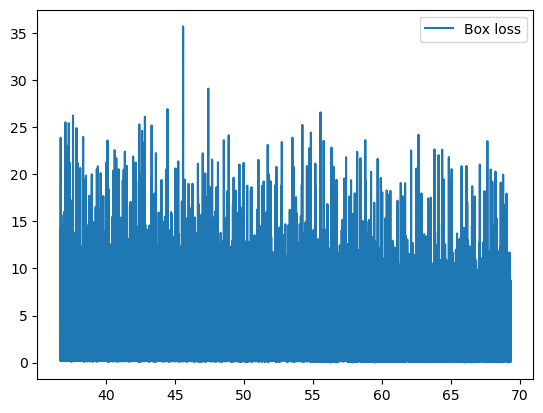

In [18]:
plt.plot(time,box, label="Box loss")
plt.legend()
plt.show()

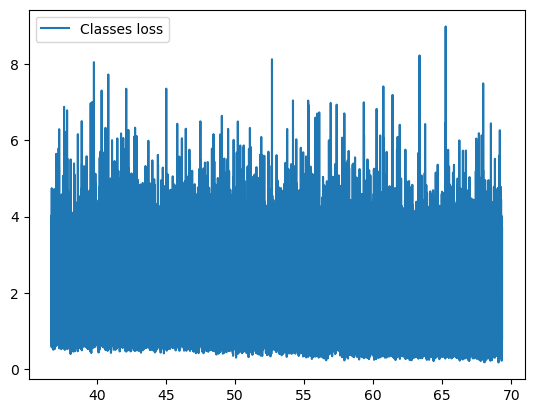

In [19]:
plt.plot(time,classes, label="Classes loss")
plt.legend()
plt.show()

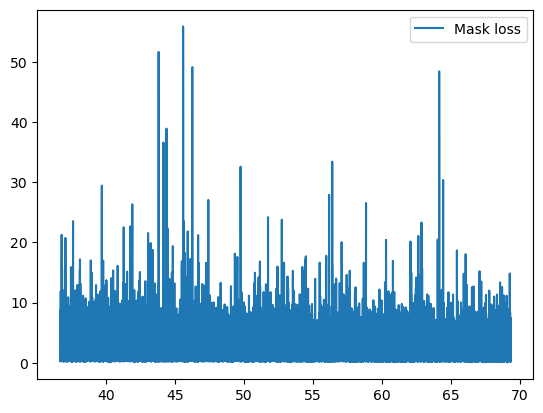

In [20]:
plt.plot(time,mask, label="Mask loss")
plt.legend()
plt.show()

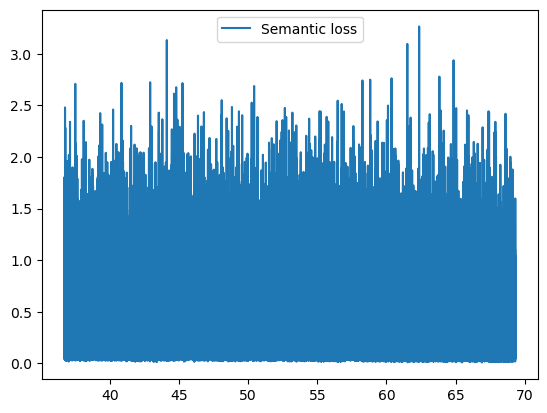

In [21]:
plt.plot(time,semantic, label="Semantic loss")
plt.legend()
plt.show()

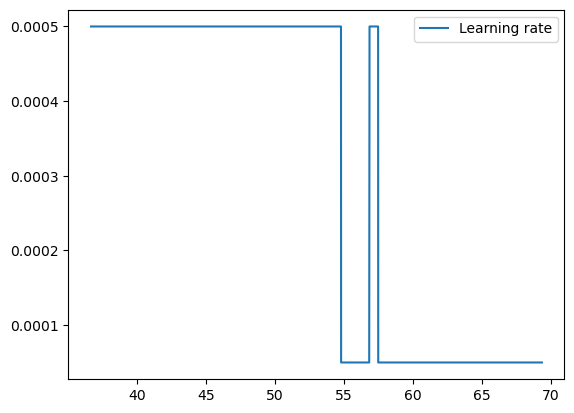

In [22]:
plt.plot(time,lr, label="Learning rate")
plt.legend()
plt.show()

In [23]:
epoch = []
loss_val = []
loss_50 = []
loss_60 = []
loss_70 = []
loss_80 = []
loss_90 = []
loss_75 = []
loss_85 = []
loss_95 = []
for line in data:
    line_dict = json.loads(line)
    if line_dict["type"] == "val":
        loss_val.append(line_dict["data"]["mask"]["all"])
        loss_50.append(line_dict["data"]["mask"]["50"])
        loss_60.append(line_dict["data"]["mask"]["60"])
        loss_70.append(line_dict["data"]["mask"]["70"])
        loss_75.append(line_dict["data"]["mask"]["75"])
        loss_80.append(line_dict["data"]["mask"]["80"])
        loss_85.append(line_dict["data"]["mask"]["85"])
        loss_90.append(line_dict["data"]["mask"]["90"])
        loss_95.append(line_dict["data"]["mask"]["95"])
        epoch.append(line_dict["data"]["epoch"])

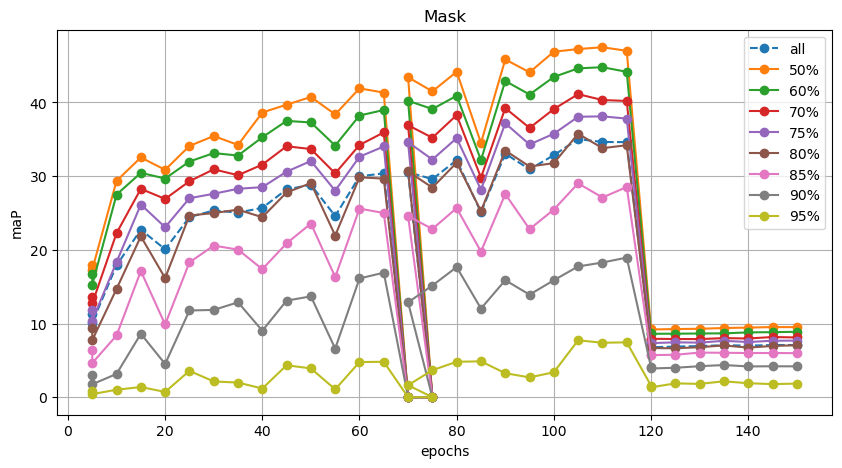

In [24]:
plt.figure(1, (10,5))
plt.plot(epoch, loss_val, "--o", label="all")
plt.plot(epoch, loss_50, "-o", label="50%")
plt.plot(epoch, loss_60, "-o", label="60%")
plt.plot(epoch, loss_70, "-o", label="70%")
plt.plot(epoch, loss_75, "-o", label="75%")
plt.plot(epoch, loss_80, "-o", label="80%")
plt.plot(epoch, loss_85, "-o", label="85%")
plt.plot(epoch, loss_90, "-o", label="90%")
plt.plot(epoch, loss_95, "-o", label="95%")

plt.grid()
plt.legend()
plt.ylabel("maP")
plt.xlabel("epochs")
plt.title("Mask")
plt.show()

In [12]:
epoch = []
loss_val = []
loss_50 = []
loss_60 = []
loss_70 = []
loss_80 = []
loss_90 = []
loss_75 = []
loss_85 = []
loss_95 = []
for line in data:
    line_dict = json.loads(line)
    if line_dict["type"] == "val":
        loss_val.append(line_dict["data"]["box"]["all"])
        loss_50.append(line_dict["data"]["box"]["50"])
        loss_60.append(line_dict["data"]["box"]["60"])
        loss_70.append(line_dict["data"]["box"]["70"])
        loss_75.append(line_dict["data"]["box"]["75"])
        loss_80.append(line_dict["data"]["box"]["80"])
        loss_85.append(line_dict["data"]["box"]["85"])
        loss_90.append(line_dict["data"]["box"]["90"])
        loss_95.append(line_dict["data"]["box"]["95"])
        epoch.append(line_dict["data"]["epoch"])

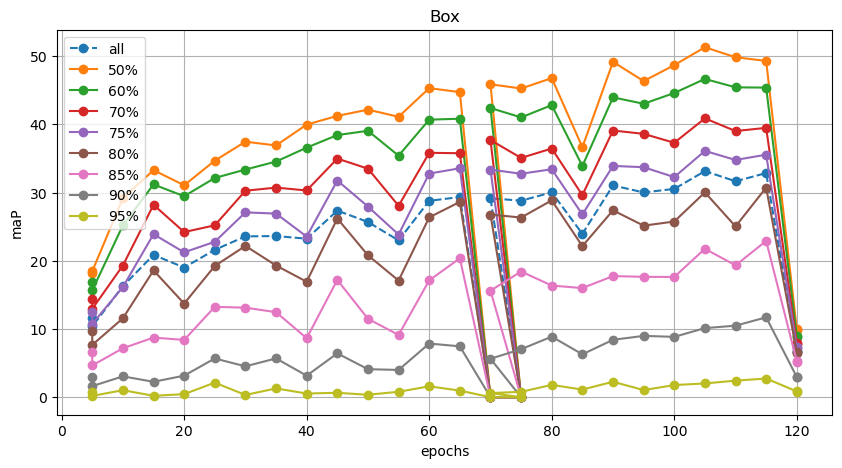

In [13]:
plt.figure(1, (10,5))
plt.plot(epoch, loss_val, "--o", label="all")
plt.plot(epoch, loss_50, "-o", label="50%")
plt.plot(epoch, loss_60, "-o", label="60%")
plt.plot(epoch, loss_70, "-o", label="70%")
plt.plot(epoch, loss_75, "-o", label="75%")
plt.plot(epoch, loss_80, "-o", label="80%")
plt.plot(epoch, loss_85, "-o", label="85%")
plt.plot(epoch, loss_90, "-o", label="90%")
plt.plot(epoch, loss_95, "-o", label="95%")

plt.grid()
plt.legend()
plt.ylabel("maP")
plt.xlabel("epochs")
plt.title("Box")
plt.show()